# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Mauricio Cantú Torres

- ID: A01633805

- My career: ITC


# Importing libraries

In [122]:
import pandas as pd             
import seaborn as sns              
import matplotlib.pyplot as plt   
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# A1 Load your dataset

In [123]:
url = "datasets/A01633805.csv"

dataset = pd.read_csv(url)

# A2 DataManagment


Print the first 7 rows

In [124]:
dataset.head(7)

,ID,x1,x2
0,0,0.547534,0.813708
1,1,1.938966,0.301662
2,2,1.000914,-0.055686
3,3,0.103483,0.320916
4,4,0.969247,-0.509860
5,5,0.294667,0.926224
6,6,1.852781,-0.013750


Print the first 4 last rows

In [125]:
dataset.tail(4)

,ID,x1,x2
801,801,1.095190,0.209274
802,802,1.415599,-0.447897
803,803,0.533525,-0.495881
804,804,0.598121,1.030575


How many rows and columns are in your data?

Use the `shape` method


In [126]:
dataset.shape

(805, 3)

Print the name of all columns 

Use the `columns` method

In [127]:
dataset.columns

Index(['ID', 'x1', 'x2'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [128]:
dataset.dtypes

ID      int64
x1    float64
x2    float64
dtype: object

What is the meaning of rows and columns?

In [ ]:
# Your responses here

# 1) Cada fila contiene 3 datos diferentes, cada uno respectivo a una columna.
# 2) De izquierda a derecha, la primera columna, o "ID", simplemente representa la posición de los siguientes 2 datos, los cuales van relacionados entre si.
# 3) las siguientes columnas, o "x1" y "x2", contienen datos que, a mi parecer, podrian ser coordenadas, pero no hay forma de asegurar esto.


Print a statistical summary of your columns


In [129]:
dataset.describe()

,ID,x1,x2
count,805.000000,805.000000,805.000000
mean,402.000000,0.498431,0.248067
std,232.527776,0.874936,0.505907
min,0.000000,-1.216622,-0.699191
25%,201.000000,-0.059115,-0.214204
50%,402.000000,0.516282,0.265616
75%,603.000000,1.073461,0.701653
max,804.000000,2.285687,1.232571


In [ ]:
# 1) What is the minumum and maximum values of each variable
# R~ "ID", 0, 804
# R~ "x1", -1.216622, 2.285687
# R~ "x2", -0.699191, 1.232571

# 2) What is the mean and standard deviation of each variable
# R~ "ID", 402, 232.527776
# R~ "x1", 0.498431, 0.874936
# R~ "x2", 0.248067, 0.505907 

# 3) What the 25%, 50% and 75% represent?
# R~ El 50% representa la "mitad" de los datos, o la mediana. 
# R~ El 25% y el 75% representan el cuarto inferior y superior de los datos respectivamente.
# R~ Estos datos nos sirven para representar datos de diferentes maneras, por ejemplo, creando un diagrama de caja y bigotes, o un "boxplot".


Rename the columns using the same name with capital letters

In [130]:
dataset = dataset.rename(columns={"x1": "X1"})
dataset = dataset.rename(columns={"x2": "X2"})
dataset

,ID,X1,X2
0,0,0.547534,0.813708
1,1,1.938966,0.301662
2,2,1.000914,-0.055686
3,3,0.103483,0.320916
4,4,0.969247,-0.509860
...,...,...,...
800,800,1.105175,-0.513542
801,801,1.095190,0.209274
802,802,1.415599,-0.447897
803,803,0.533525,-0.495881


Rename the columns to their original names

In [131]:
dataset = dataset.rename(columns={"X1": "x1"})
dataset = dataset.rename(columns={"X2": "x2"})
dataset

,ID,x1,x2
0,0,0.547534,0.813708
1,1,1.938966,0.301662
2,2,1.000914,-0.055686
3,3,0.103483,0.320916
4,4,0.969247,-0.509860
...,...,...,...
800,800,1.105175,-0.513542
801,801,1.095190,0.209274
802,802,1.415599,-0.447897
803,803,0.533525,-0.495881


Use two different alternatives to get one of the columns

In [132]:
dataset.x1

0      0.547534
1      1.938966
2      1.000914
3      0.103483
4      0.969247
         ...   
800    1.105175
801    1.095190
802    1.415599
803    0.533525
804    0.598121
Name: x1, Length: 805, dtype: float64

In [133]:
dataset.iloc[:,2]

0      0.813708
1      0.301662
2     -0.055686
3      0.320916
4     -0.509860
         ...   
800   -0.513542
801    0.209274
802   -0.447897
803   -0.495881
804    1.030575
Name: x2, Length: 805, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [134]:
dataset.loc[62:72, ["x1","x2"]]

,x1,x2
62,-0.685234,0.632673
63,1.464215,-0.396276
64,-0.000505,0.933009
65,0.888161,0.510970
66,0.811323,0.490915
67,0.032034,0.288647
68,0.354346,-0.215316
69,-0.221435,0.934618
70,-0.981270,0.148859
71,0.609541,-0.422946


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [135]:
dataset.x1.isnull().sum()


0

In [136]:
dataset.x2.isnull().sum()

0

Discard the first column


In [137]:
dataset.drop(['ID'],axis='columns',inplace=True)
dataset

,x1,x2
0,0.547534,0.813708
1,1.938966,0.301662
2,1.000914,-0.055686
3,0.103483,0.320916
4,0.969247,-0.509860
...,...,...
800,1.105175,-0.513542
801,1.095190,0.209274
802,1.415599,-0.447897
803,0.533525,-0.495881


### Questions 

Based on the previous results, provide a description of yout dataset

Your response: 

##### Ahora que se ha eliminado la columna "ID", únicamente tenemos un dataset con el mismo número de filas, pero con una columna menos, es decir, un dataset de 805 filas x 2 columnas.



# A3 Data visualization

Plot in the same figure the histogram of the first two variables

<AxesSubplot:>

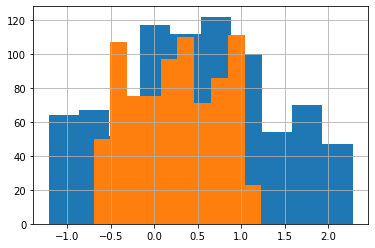

In [140]:
dataset["x1"].hist()
dataset["x2"].hist()

Based on this two plots, provide a description of your data:

Your response here:

##### En base a lo que se observa, se puede afirmar que los datos contenidos por la variable "x1" estan más distribuidos que los de la variable "x2".

Plot in the same figure the boxplot of the first two variables 

<AxesSubplot:>

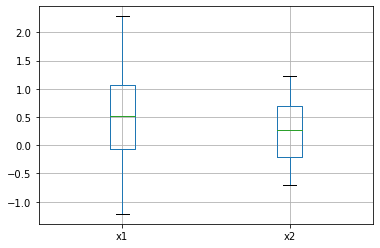

In [141]:
dataset.boxplot()

Scatter plot of the two first variables

<function matplotlib.pyplot.show(close=None, block=None)>

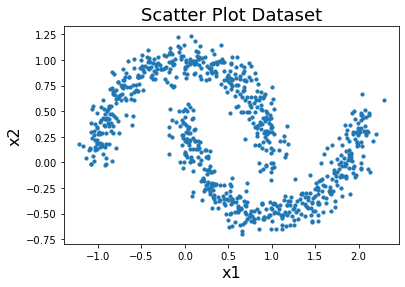

In [142]:
plt.scatter(dataset.x1, dataset.x2, s=10)
plt.title("Scatter Plot Dataset", fontsize=18)
plt.xlabel("x1", fontsize=16)
plt.ylabel("x2", fontsize=16)

plt.show

### Questions 

Based on the previous plots, provide a description of yout dataset

Your response:

##### El boxplot muestra que los datos están distribuidos de diferentes maneras, siendo "x1" la variable con el mayor rango de datos. Esto apoya lo que se muestra en el histograma realizado con anterioridad. Además, el scatter plot revela que los datos están organizados de una forma uniforme al compararse entre sí.

# A4 Kmeans

Do Kmeans clustering assuming a number of clusters according to your scatter plot

In [143]:
km = KMeans(n_clusters=2)

yp = km.fit_predict(dataset[['x1','x2']])

yp

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,

Add to your dataset a column with the assigned cluster to each data point

In [144]:
dataset['Cluster'] = yp

dataset

,x1,x2,Cluster
0,0.547534,0.813708,0
1,1.938966,0.301662,1
2,1.000914,-0.055686,1
3,0.103483,0.320916,0
4,0.969247,-0.509860,1
...,...,...,...
800,1.105175,-0.513542,1
801,1.095190,0.209274,1
802,1.415599,-0.447897,1
803,0.533525,-0.495881,1


Print the number associated to each cluster

In [145]:
dataset.Cluster.unique()

array([0, 1])

Print the centroids

In [146]:
km.cluster_centers_

array([[-0.19771983,  0.58448331],
       [ 1.19979042, -0.09086658]])

Print the intertia metric

In [147]:
km.inertia_

336.41941736824157

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

<ipython-input-148-0459951b4e2f>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.x1, df1.x2, Label='x1', s=10)
<ipython-input-148-0459951b4e2f>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.x1, df2.x2, Label='x2', s=10)


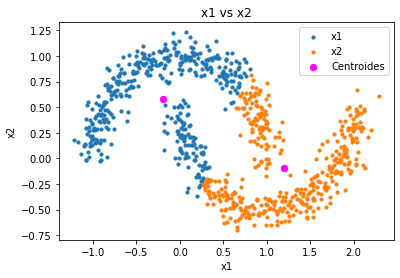

In [148]:
df1 = dataset[dataset.Cluster==0]
df2 = dataset[dataset.Cluster==1]

plt.scatter(df1.x1, df1.x2, Label='x1', s=10)
plt.scatter(df2.x1, df2.x2, Label='x2', s=10)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='o', label='Centroides', s=40)

plt.title('x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Questions 

Provides a detailed description of your results

Your response:

##### Kmeans es un algoritmo no supervisado de machine learning que nos permite agrupar e identificar datos para después ser incluidos en otras estructuras de datos, para hacer esto, el agoritmo utiliza un proceso denominado "clustering". El proceso de clustering es un concepto sumamente importante para el análisis de datos. Tener la capacidad de agrupar nuestros datos para que cada grupo contenga únicamente a datos con características similares es una herramienta muy poderosa para organizar una estructura de datos grande.

# A4 Elbow plot

Compute the Elbow plot

In [149]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['x1','x2']])
    sse.append(km.inertia_)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


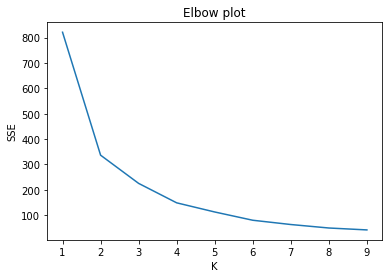

In [150]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

### Questions 

What is the best number of clusters K? (argue your response)

Your response:

##### La gráfica muestra que el cambio empieza a normalizarse después del 4 en el eje "K", aproximadamente. Es por lo anterior que se puede afirmar que el número de clusters apropiado para K en este caso es de 4.

Does this number of clusters agree with your inital guess? (argue your response)

Your response:

##### El número elegido para realizar los clusters fue asignado de manera aleatoria, por lo cual no coincide con lo que se muestra en el elbow plot.


# A4 Normalizing the data: preprocessing using min max scaler


Normalize the data using min max scaler

In [151]:
scaler = MinMaxScaler()

scaler.fit(dataset[['x1']])
dataset['x1'] = scaler.transform(dataset[['x1']])

scaler.fit(dataset[['x2']])
dataset['x2'] = scaler.transform(dataset[['x2']])

dataset

,x1,x2,Cluster
0,0.503712,0.783170,0
1,0.901002,0.518103,1
2,0.633164,0.333118,1
3,0.376924,0.528071,0
4,0.624122,0.098010,1
...,...,...,...
800,0.662933,0.096104,1
801,0.660082,0.470278,1
802,0.751567,0.130086,1
803,0.499712,0.105246,1


Print a statistical summary of your columns (normalized data)

In [152]:
dataset.describe()

,x1,x2,Cluster
count,805.000000,805.000000,805.000000
mean,0.489692,0.490359,0.498137
std,0.249817,0.261889,0.500307
min,0.000000,0.000000,0.000000
25%,0.330498,0.251059,0.000000
50%,0.494789,0.499444,0.000000
75%,0.653878,0.725164,1.000000
max,1.000000,1.000000,1.000000


In [153]:
# 1) What is the minumum and maximum values of each variable
# R~ "x1", 0, 1
# R~ "x2", 0, 1
# R~ "Cluster", 0, 1

# 2) What is the mean and standard deviation of each variable
# R~ "x1", 0.489692, 0.249817
# R~ "x2", 0.490359, 0.261889
# R~ "Cluster", 0.501863, 0.500307

# 3) What the 25%, 50% and 75% represent?
# R~ El 50% representa la "mitad" de los datos, o la mediana. 
# R~ El 25% y el 75% representan el cuarto inferior y superior de los datos respectivamente.
# R~ Estos datos nos sirven para representar datos de diferentes maneras, por ejemplo, creando un diagrama de caja y bigotes, o un "boxplot".

# 4) Are the minimum and maximum values equal to your original data?
# R~ No, esto se debe a que, independientemente de los valores previos que tenían las variables, la normalización de los datos en este caso resulta en que el mínimo sea 0 y el máximo sea 1.

Plot the scatter plot of your normalizaed data

<function matplotlib.pyplot.show(close=None, block=None)>

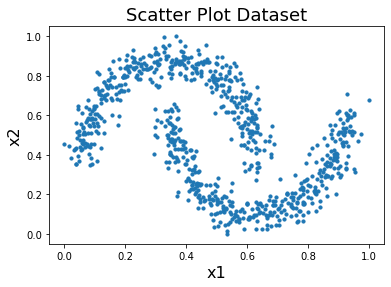

In [154]:
plt.scatter(dataset.x1, dataset.x2, s=10)
plt.title("Scatter Plot Dataset", fontsize=18)
plt.xlabel("x1", fontsize=16)
plt.ylabel("x2", fontsize=16)

plt.show

Do Kmeans clustering assuming a number of clusters according to your scatter plot

In [155]:
km = KMeans(n_clusters=4)

yp = km.fit_predict(dataset[['x1','x2']])

yp

array([2, 0, 3, 1, 3, 2, 0, 3, 3, 2, 3, 1, 1, 2, 1, 0, 3, 1, 2, 1, 0, 0,
       3, 1, 3, 3, 3, 3, 2, 2, 3, 2, 2, 0, 1, 2, 1, 2, 2, 3, 2, 3, 2, 3,
       0, 0, 1, 0, 3, 1, 1, 0, 3, 2, 3, 3, 3, 0, 1, 1, 1, 1, 1, 3, 2, 0,
       0, 1, 3, 2, 1, 3, 2, 2, 3, 3, 2, 1, 1, 2, 2, 1, 3, 2, 1, 2, 0, 1,
       0, 2, 1, 0, 2, 2, 1, 3, 0, 2, 3, 2, 2, 2, 0, 3, 2, 3, 3, 1, 2, 0,
       3, 0, 1, 1, 0, 3, 3, 3, 2, 2, 3, 0, 3, 2, 2, 3, 0, 2, 2, 3, 0, 0,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 3, 2, 1, 2, 0, 2, 0, 3, 2, 3, 3, 0,
       3, 2, 0, 1, 2, 1, 1, 1, 1, 0, 3, 2, 0, 3, 1, 3, 3, 1, 0, 2, 2, 1,
       2, 3, 0, 3, 0, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2, 1, 1, 0, 3, 1, 0, 3,
       2, 1, 3, 1, 1, 1, 1, 0, 3, 2, 1, 3, 2, 3, 3, 2, 1, 2, 3, 3, 2, 0,
       0, 3, 0, 3, 3, 2, 2, 2, 3, 1, 1, 2, 3, 3, 2, 0, 0, 3, 1, 0, 3, 0,
       2, 2, 3, 3, 0, 3, 0, 2, 0, 2, 3, 0, 2, 3, 2, 3, 3, 0, 2, 3, 2, 2,
       0, 3, 1, 3, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 3, 0, 2, 2, 2, 0, 3,
       3, 0, 0, 3, 3, 0, 1, 2, 3, 3, 3, 1, 0, 2, 2,

Add to your dataset a column with the assigned cluster to each data point

In [156]:
dataset

,x1,x2,Cluster
0,0.503712,0.783170,0
1,0.901002,0.518103,1
2,0.633164,0.333118,1
3,0.376924,0.528071,0
4,0.624122,0.098010,1
...,...,...,...
800,0.662933,0.096104,1
801,0.660082,0.470278,1
802,0.751567,0.130086,1
803,0.499712,0.105246,1


Print the centroids

In [157]:
km.cluster_centers_

array([[0.78719924, 0.46000872],
       [0.20273931, 0.53202366],
       [0.38546074, 0.81397699],
       [0.60555427, 0.16500231]])

Print the intetia metric

In [158]:
km.inertia_

21.74056672246203

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

<ipython-input-159-0459951b4e2f>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.x1, df1.x2, Label='x1', s=10)
<ipython-input-159-0459951b4e2f>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.x1, df2.x2, Label='x2', s=10)


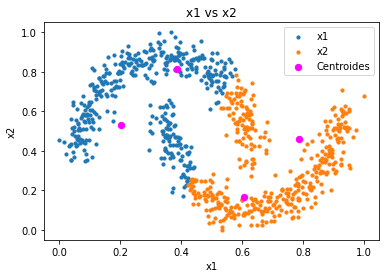

In [159]:
df1 = dataset[dataset.Cluster==0]
df2 = dataset[dataset.Cluster==1]

plt.scatter(df1.x1, df1.x2, Label='x1', s=10)
plt.scatter(df2.x1, df2.x2, Label='x2', s=10)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='o', label='Centroides', s=40)

plt.title('x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Questions 

Provides a detailed description of your results. Does the normalization improves the clustering?

Your response:

##### Normalizar los datos ayuda a que estos sean legibles y fáciles de comprender. Sin embargo, no siempre habrá beneficios cuando se realice la normalización de los datos, pero es importante hacerlo de todas formas, ya que tampoco perjudica de ninguna manera a la estructura de datos. En este caso, la representación de los datos es mejor, ya que tenemos un número más apropiado de clusters y los datos están mejor agrupados, ya que la escala es de 0 a 1.

# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

##### Todo lo que está relacionado con kmeans es un gran ejemplo de aplicación para esta subcompetencia, ya que se trabaja con un conjunto de datos distribuido entre dos variables. En el caso de la materia, aplicamos kmeans a 3 modelos de datos bivariados, siendo estos el "cartwheel", "iris" y los datos proporcionados para esta evidencia final. Las interacciones realizadas con estos modelos fueron muchas, algunos ejemplos son las gráficas de los datos con sus respectivos clusters, los histogramas, los boxplots, entre otros. A partir de los resultados obtenidos, se redactaron conclusiones respecto al conjunto de datos donde se aplicaron estos métodos. En base a lo anterior, concluyo que si cumplo con la subcompetencia descrita con anterioridad.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

##### A lo largo de la semana, se han construido múltiples modelos bivariados que explican fenómenos distintos, un ejemplo de esto es el dataset de iris, en el cual se realizó el proceso de kmeans con diferentes combinaciones de 2 variables, esto con el objetivo de comparar la varianza de los datos dependiendo del tipo de flor. Cabe mencionar que este es un ejemplo de todos los realizados a lo largo de la semana. Es en base a esto que concluyo que si cumplo con la subcompetencia descrita en este apartado.